### BEGINNER LEVEL TASK (PART 01):-
**Exploratory Sales Analysis**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for better visuals
sns.set(style="whitegrid")


In [2]:
# Load training data
df = pd.read_csv("train.csv")

# Display first 5 rows
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Column information
df.info()

# Statistical summary
df.describe()


Shape of dataset: (3000888, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [4]:
# Check missing values
df.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [5]:
# Fill missing values
df['sales'] = df['sales'].fillna(0)
df['onpromotion'] = df['onpromotion'].fillna(0)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify changes
df.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
mean_sales = df['sales'].mean()
median_sales = df['sales'].median()
mode_sales = df['sales'].mode()[0]

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)


Mean Sales: 357.77574911261894
Median Sales: 11.0
Mode Sales: 0.0


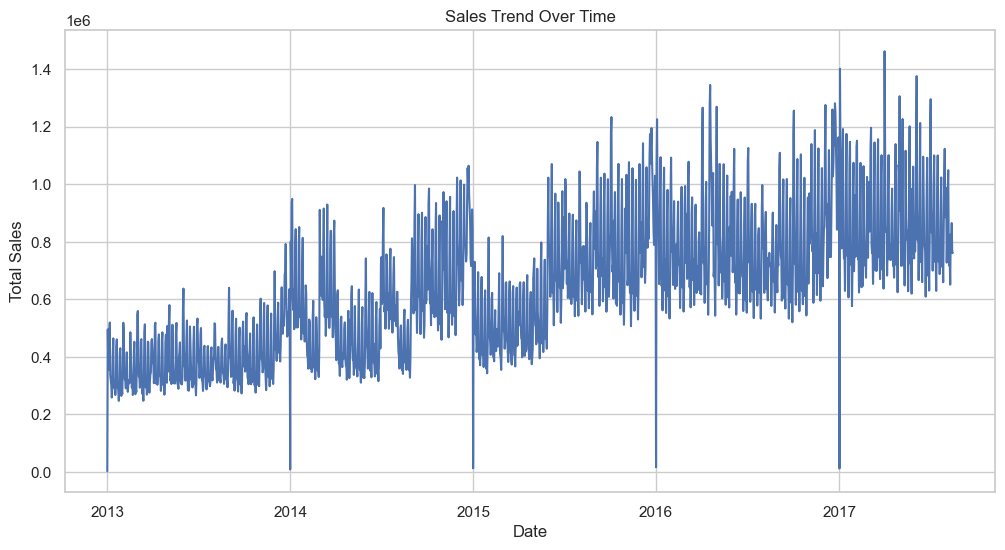

In [7]:
# Aggregate daily total sales
daily_sales = df.groupby('date')['sales'].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


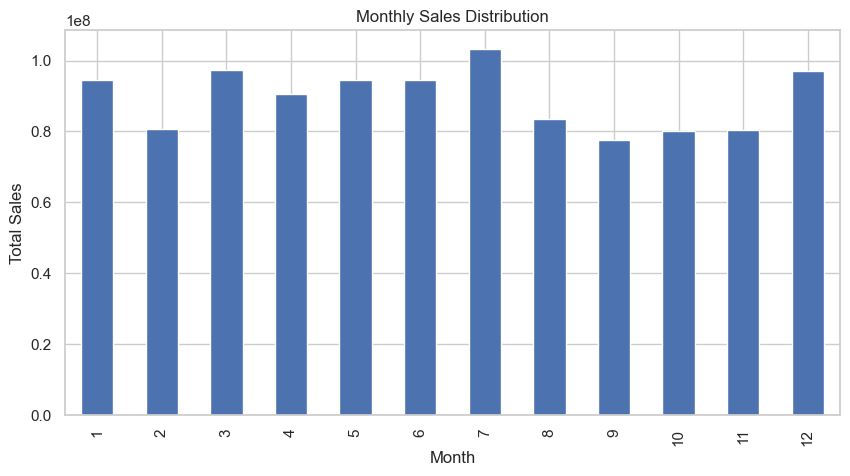

In [8]:
# Create month column
df['month'] = df['date'].dt.month

# Aggregate monthly sales
monthly_sales = df.groupby('month')['sales'].sum()

# Plot
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


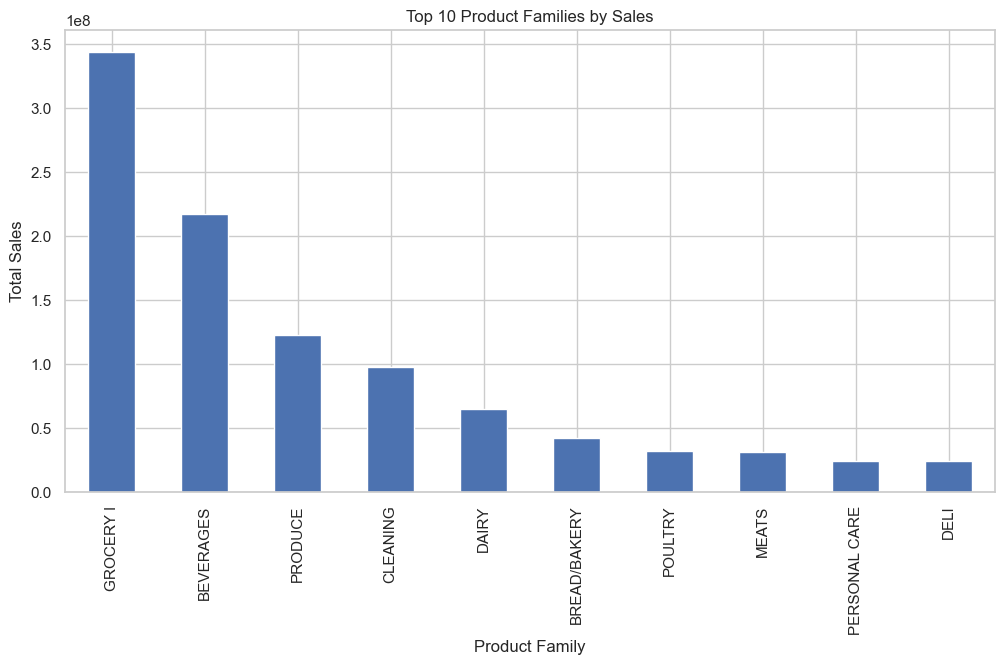

In [9]:
family_sales = df.groupby('family')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
family_sales.head(10).plot(kind='bar')
plt.title("Top 10 Product Families by Sales")
plt.xlabel("Product Family")
plt.ylabel("Total Sales")
plt.show()


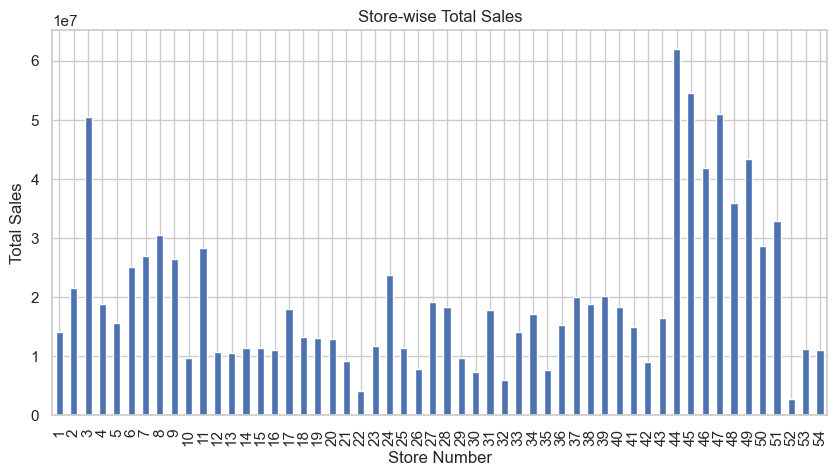

In [10]:
store_sales = df.groupby('store_nbr')['sales'].sum()

plt.figure(figsize=(10,5))
store_sales.plot(kind='bar')
plt.title("Store-wise Total Sales")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
# Load training dataset
df = pd.read_csv("train.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


**Conclusion:**
*A simple sales forecasting model was implemented using moving averages to smooth historical sales data and identify underlying trends. Weekly and monthly rolling averages provided baseline forecasts for future sales.*